In [1]:
import warnings
import os
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, kurtosis

warnings.filterwarnings('ignore')


## Analysis on data

In [5]:
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
processed_data_dir = os.path.join(parent_dir, 'data', 'processed')

In [6]:
df = pd.read_csv(os.path.join(processed_data_dir, 'insurance_feature_engineered.csv'))

In [7]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI,MajorSurgeryDone,BMI_Category,Age_Category
0,45,0,0,0,0,155,57,0,0,0,25000,23.725286,0,Normal weight,Middle Aged Adults
1,60,1,0,0,0,180,73,0,0,0,29000,22.530864,0,Normal weight,Senior
2,36,1,1,0,0,158,59,0,0,1,23000,23.634033,1,Normal weight,Adult
3,52,1,1,0,1,183,93,0,0,2,28000,27.770313,1,Overweight,Middle Aged Adults
4,38,0,0,0,1,166,88,0,0,1,23000,31.934969,1,Obesity Class 1,Adult


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      986 non-null    int64  
 1   Diabetes                 986 non-null    int64  
 2   BloodPressureProblems    986 non-null    int64  
 3   AnyTransplants           986 non-null    int64  
 4   AnyChronicDiseases       986 non-null    int64  
 5   Height                   986 non-null    int64  
 6   Weight                   986 non-null    int64  
 7   KnownAllergies           986 non-null    int64  
 8   HistoryOfCancerInFamily  986 non-null    int64  
 9   NumberOfMajorSurgeries   986 non-null    int64  
 10  PremiumPrice             986 non-null    int64  
 11  BMI                      986 non-null    float64
 12  MajorSurgeryDone         986 non-null    int64  
 13  BMI_Category             986 non-null    object 
 14  Age_Category             9

In [9]:
df.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI,MajorSurgeryDone
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996,27.460709,0.514199
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382,5.878671,0.500052
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000,15.156281,0.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000,23.393392,0.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000,27.156602,1.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000,30.759870,1.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000,50.000000,1.000000


In [10]:
df.shape

(986, 15)

In [11]:
print('Unique values for Diabetes column:', list(df['Diabetes'].unique()))
print('Unique values for BloodPressureProblems columns:', list(df['BloodPressureProblems'].unique()))
print('Unique values for AnyTransplants column:', list(df['AnyTransplants'].unique()))
print('Unique values for AnyChronicDiseases column:', list(df['AnyChronicDiseases'].unique()))
print('Unique values for KnownAllergies column:', list(df['KnownAllergies'].unique()))
print('Unique values for HistoryOfCancerInFamily column:', list(df['HistoryOfCancerInFamily'].unique()))
print('Unique values for NumberOfMajorSurgeries column:', list(df['NumberOfMajorSurgeries'].unique()))

Unique values for Diabetes column: [0, 1]
Unique values for BloodPressureProblems columns: [0, 1]
Unique values for AnyTransplants column: [0, 1]
Unique values for AnyChronicDiseases column: [0, 1]
Unique values for KnownAllergies column: [0, 1]
Unique values for HistoryOfCancerInFamily column: [0, 1]
Unique values for NumberOfMajorSurgeries column: [0, 1, 2, 3]


In [12]:
def cm_to_feet_inches(cm):
    inches = cm / 2.54
    feet = int(inches // 12)
    inches = inches % 12
    return f"{feet}ft {int(inches)}in"

cm_to_feet_inches(df['Height'].min()), cm_to_feet_inches(df['Height'].max())

('4ft 9in', '6ft 2in')

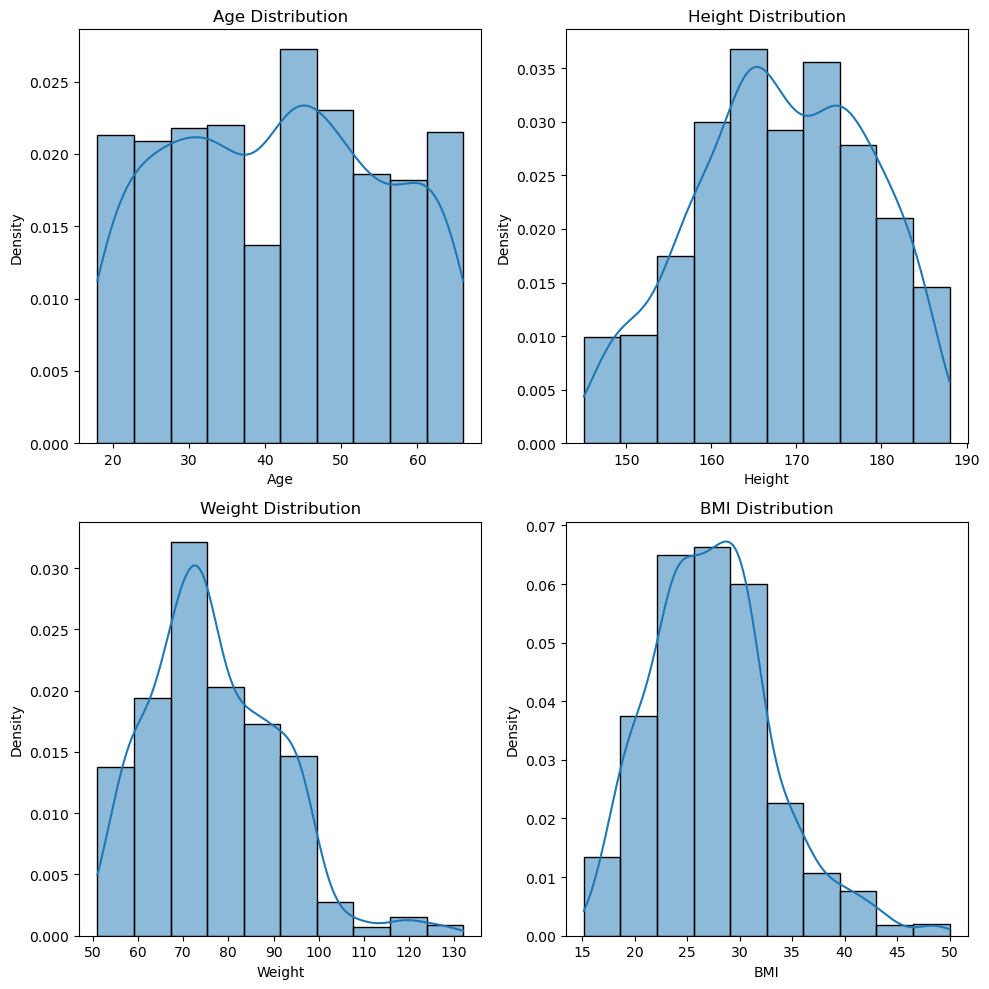

In [13]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ax = ax.flatten()

sns.histplot(df['Age'], bins=10, stat='density', kde=True, ax=ax[0])
ax[0].set_title('Age Distribution')

sns.histplot(df['Height'], bins=10, stat='density', kde=True, ax=ax[1])
ax[1].set_title('Height Distribution')

sns.histplot(df['Weight'], bins=10, stat='density', kde=True, ax=ax[2])
ax[2].set_title('Weight Distribution')

sns.histplot(df['BMI'], bins=10, stat='density', kde=True, ax=ax[3])
ax[3].set_title('BMI Distribution')

plt.tight_layout()
plt.show()

In [14]:
alpha = 0.05
print("Age variable is", "not normally distributed" if shapiro(df['Age'])[1] < alpha else "normally distributed.")
print("Height variable is", "not normally distributed" if shapiro(df['Height'])[1] < alpha else "normally distributed.")
print("Weight variable is", "not normally distributed" if shapiro(df['Weight'])[1] < alpha else "normally distributed.")

Age variable is not normally distributed
Height variable is not normally distributed
Weight variable is not normally distributed


In [15]:
df[['Age', 'Height', 'Weight']].skew()

Age       0.029895
Height   -0.179788
Weight    0.666726
dtype: float64

In [16]:
kurtosis(df[['Age', 'Height', 'Weight']])

array([-1.13206794, -0.76419569,  0.60111046])

In [17]:
kurtosis(df[['Age', 'Height', 'Weight']], fisher=False)

array([1.86793206, 2.23580431, 3.60111046])

**Observation:** 
- Age, Height, Weight although are not normally distributed.
- The skewness value of Age is almost close to 0, where the height data is slightly left skewed and Weight data is slightly right skewed
- Age and Hieght are Platykurtic with Lighter tails, fewer outliers, whereas Weight is Leptokurtic Heavier tails, more outliers

In [18]:
df.loc[df['Weight'] > 100]['Height'].agg(['min', 'max'])

min    156
max    185
Name: Height, dtype: int64

In [19]:
cm_to_feet_inches(df.loc[df['Weight'] > 100]['Height'].min()), cm_to_feet_inches(df.loc[df['Weight'] > 100]['Height'].max())

('5ft 1in', '6ft 0in')

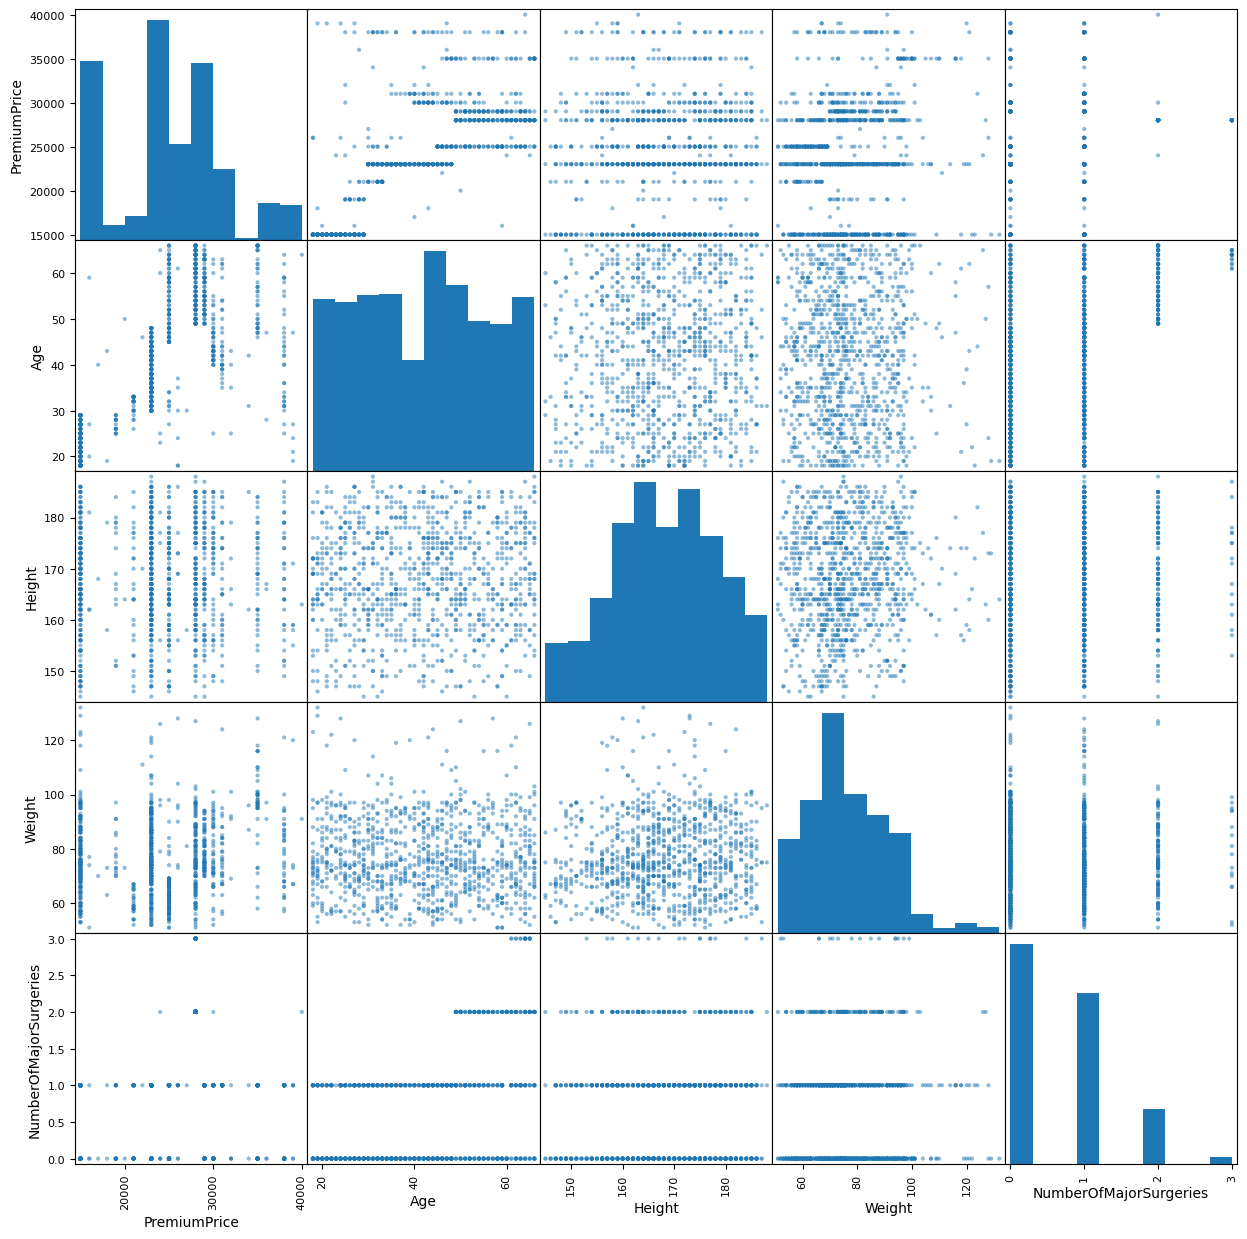

In [20]:
scatter_matrix(df[['PremiumPrice', 'Age', 'Height', 'Weight', 'NumberOfMajorSurgeries']], figsize=(15, 15))
plt.show()

<Axes: >

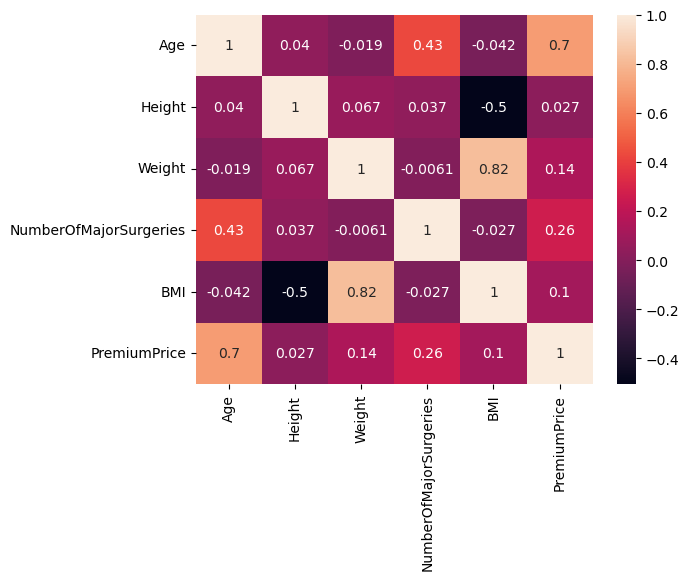

In [22]:
sns.heatmap(df[['Age', 'Height', 'Weight', 'NumberOfMajorSurgeries', 'BMI', 'PremiumPrice']].corr(), annot=True)

## Missing Value detection

In [23]:
df.isna().sum().sum()

0

There are no missing values

## Outliers detection

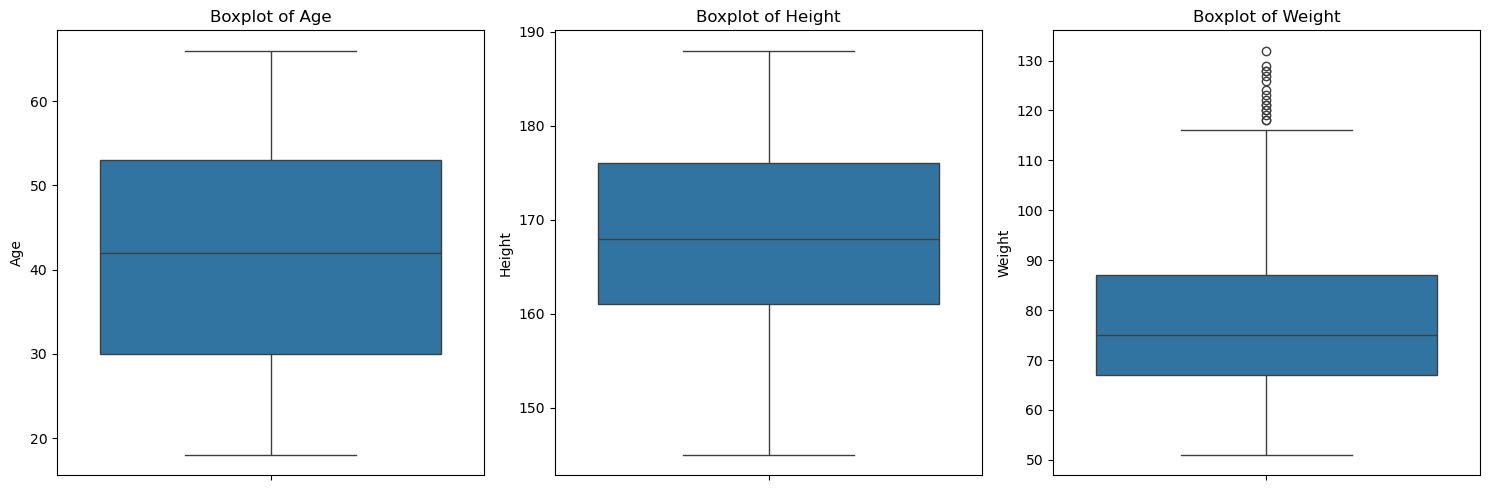

In [24]:
numeric_columns = ['Age', 'Height', 'Weight']

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax = ax.flatten()

for index, column in enumerate(numeric_columns):
    sns.boxplot(y=df[column], ax=ax[index])
    ax[index].set_title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

While there are a few outliers in the weight data, we can still build and track overall performance. It's normal to see some outliers since some policyholders might be overweight.